In [26]:
from sklearn.linear_model import LogisticRegression 
import pandas as pd
import numpy as np 

#import data
data = pd.read_csv('train.csv')
data.replace( -999., np.NaN, inplace=True)

#remove the columns containing missing values
#DER columns
#der_headers = [x for x in data.columns if 'DER' in x]
#PRI columns containing lead
#leading_pri_headers = [x for x in data.columns if 'leading' in x]
#data.drop(columns=der_headers+leading_pri_headers, inplace = True)

x = data.drop(columns=['Prediction'])
x = x.values
y = data['Prediction']

clf = LogisticRegression(random_state=0).fit(x, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

C:\Users\fabri\Anaconda3\envs\tirocinio\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\fabri\Anaconda3\envs\tirocinio\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Check:  True True
                                Score  Nan_percentage  Outliers_percentage
DER_mass_transverse_met_lep  0.351428             0.0                 0.74
DER_met_phi_centrality       0.271752             0.0                 0.00
PRI_tau_pt                   0.235238             0.0                 1.79
DER_deltaeta_jet_jet         0.227925             0.0                 2.71
DER_mass_jet_jet             0.227832             0.0                 2.56
DER_lep_eta_centrality       0.223175             0.0                 0.00
DER_pt_ratio_lep_tau         0.195398             0.0                 1.55
DER_pt_h                     0.192526             0.0                 1.92
DER_prodeta_jet_jet          0.189891             0.0                 0.98
PRI_jet_leading_pt           0.165253             0.0                 1.77
DER_mass_MMC                 0.161623             0.0                 1.38
DER_sum_pt                   0.153236             0.0                 1.87
PRI_met

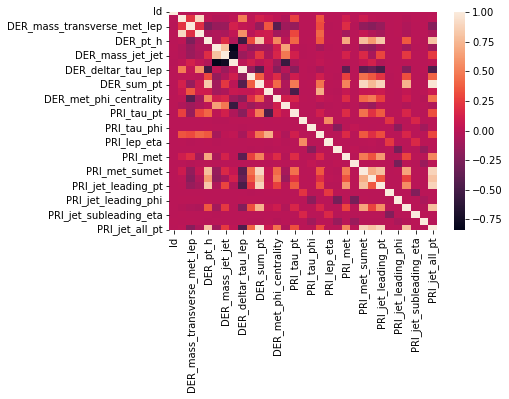

In [54]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier



data = pd.read_csv('train.csv')
data.replace( -999., np.NaN, inplace=True)
sns.heatmap(data.corr())

data.Prediction = 2*(data.Prediction == 'b')-1
data.Prediction.sort_values(ascending = True)

data.fillna(0., inplace=True)


#compute relevat metrics on features
feature_score = data.corr()['Prediction'].abs().sort_values(ascending = False).drop(['Id', 'Prediction'])
features_nan = (data.isna().drop(columns=['Id', 'Prediction']).sum()/float(len(data))*100).round(1)
features_outliers = (((data-data.mean())/data.std() > 3.).sum() / data.count().astype(float)*100.).drop(['Prediction', 'Id'])
print('Check: ', set(list(feature_score.index)) ==  set(list(features_nan.index)), set(list(feature_score.index)) ==  set(list(features_outliers.index)))

#create dataset w features metrics
features = pd.concat([feature_score, features_outliers.round(2), features_nan], axis = 1, )
features.columns = pd.Index(['Score', 'Outliers_percentage', 'Nan_percentage'])
print(features[['Score', 'Nan_percentage', 'Outliers_percentage']].sort_values('Score', ascending=False))


In [59]:
x = data.drop(columns=['Prediction'])
x = x.values
y = data['Prediction']

clf = RandomForestClassifier(max_depth=2, n_estimators=50).fit(x, y)
clf.score(x, y)

0.736892

In [37]:

data['Prediction'] = (data['Prediction'] == 'b')
data.replace( -999., 0., inplace=True)
data.corr()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Id,1.000000,NaN,-0.000214,-0.006059,-0.001851,0.002073,0.003741,0.002357,-0.004765,-0.001349,...,-0.001141,0.002312,0.000175,0.002797,0.002993,0.002165,-0.000039,-0.002718,0.003632,0.001024
Prediction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DER_mass_MMC,-0.000214,NaN,1.000000,0.221152,0.911795,0.023743,-0.027467,-0.021716,0.018621,0.497405,...,-0.000081,0.088447,0.015205,0.006454,0.002453,0.006588,-0.016114,0.004979,-0.001914,0.011093
DER_mass_transverse_met_lep,-0.006059,NaN,0.221152,1.000000,0.190109,-0.249116,-0.134007,-0.132298,0.123520,0.043251,...,-0.015925,-0.167811,-0.210537,-0.145892,0.000072,0.006824,-0.036199,0.001802,0.006880,-0.210009
DER_mass_vis,-0.001851,NaN,0.911795,0.190109,1.000000,-0.062562,-0.039032,-0.055280,0.032945,0.579712,...,-0.001467,0.053300,-0.026860,-0.076472,0.002569,0.005583,-0.049472,0.002181,-0.000688,-0.052902
DER_pt_h,0.002073,NaN,0.023743,-0.249116,-0.062562,1.000000,-0.037698,0.188946,-0.026260,-0.539379,...,0.008585,0.782547,0.623401,0.826278,0.002842,0.000993,0.360062,0.000192,-0.007824,0.808616
DER_deltaeta_jet_jet,0.003741,NaN,-0.027467,-0.134007,-0.039032,-0.037698,1.000000,0.797181,-0.835993,0.030562,...,-0.003103,-0.141291,-0.175495,-0.043514,-0.002005,-0.000819,-0.090497,-0.004843,0.001234,-0.108775
DER_mass_jet_jet,0.002357,NaN,-0.021716,-0.132298,-0.055280,0.188946,0.797181,1.000000,-0.763316,-0.119081,...,0.001166,0.163529,-0.074390,0.283724,-0.000732,0.000983,0.235312,-0.003059,-0.002185,0.240043
DER_prodeta_jet_jet,-0.004765,NaN,0.018621,0.123520,0.032945,-0.026260,-0.835993,-0.763316,1.000000,0.010708,...,0.002677,0.047484,0.123566,-0.026637,-0.003548,-0.003038,0.002877,-0.002528,0.002133,0.018037
DER_deltar_tau_lep,-0.001349,NaN,0.497405,0.043251,0.579712,-0.539379,0.030562,-0.119081,0.010708,1.000000,...,-0.001570,-0.407002,-0.347904,-0.483625,-0.000157,0.006808,-0.231997,0.001928,0.007244,-0.448737


In [24]:
data.mean()

C:\Users\fabri\Anaconda3\envs\tirocinio\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Id                             224999.500000
DER_mass_MMC                      103.280465
DER_mass_transverse_met_lep        49.239819
DER_mass_vis                       81.181982
DER_pt_h                           57.895962
DER_deltaeta_jet_jet                0.697497
DER_mass_jet_jet                  107.881121
DER_prodeta_jet_jet                -0.238431
DER_deltar_tau_lep                  2.373100
DER_pt_tot                         18.917332
DER_sum_pt                        158.432217
DER_pt_ratio_lep_tau                1.437609
DER_met_phi_centrality             -0.128305
DER_lep_eta_centrality              0.132983
PRI_tau_pt                         38.707419
PRI_tau_eta                        -0.010973
PRI_tau_phi                        -0.008171
PRI_lep_pt                         46.660207
PRI_lep_eta                        -0.019507
PRI_lep_phi                         0.043543
PRI_met                            41.717235
PRI_met_phi                        -0.010119
PRI_met_su

In [18]:
clf.score(x,y)

0.729444

In [100]:
import numpy as np
import sklearn as sk
import pandas as pd


In [116]:
def get_exponents(n_variables, degree):
    """Generates the eponents for all the monomials of degreeGenerates a list of lists using a recursive function"""
    #initial step
    if n_variables == 1:
        yield [degree]
        return
    #recursive step
    for i in range(degree + 1):
        for t in get_exponents(n_variables - 1, degree - i):
            yield [i] + t

def exponents(n_variables, degree):
    """Transforms the output of get_exponents in a numpy array"""
    #create a list
    exp = [e for e in get_exponents(n_variables, degree)]
    #cast it to np.array
    exp = np.array(exp)
    return exp

def gen_new_features(x, degree):
    """Generate the new features, generated using an homogeneous polynomial of a given degree.
    # Input: 
    x, array of shape (n_samples, n_initial_features)
    # Returns: 
    res, array  of shape (n_samples, n_monomials_in_homogeneous_polynomial)"""
    #reshape x to allow broadcasting
    x =  np.expand_dims(x, axis = 1)
    #get the exponents
    exp = exponents(n_variables=x.shape[-1], degree= degree )
    #compute the new features
    res = x**exp
    res = res.prod(axis = -1)
    return res
    
#test the functions
#create the fake data
x = (np.arange(3)+2).reshape(1, -1)
x = np.append(x, x, axis = 0)

x, gen_new_features(x, 2)

(array([[2, 3, 4],
        [2, 3, 4]]),
 array([[16, 12,  9,  8,  6,  4],
        [16, 12,  9,  8,  6,  4]], dtype=int32))

In [ ]:
gen_new_features()

In [112]:
from sklearn.linear_model import LogisticRegression

#import data
data = pd.read_csv('./data/train.csv.zip')
data.replace( -999., np.NaN, inplace=True)

#remove the columns containing missing values
#DER columns
der_headers = [x for x in data.columns if 'DER' in x]
#PRI columns containing lead
leading_pri_headers = [x for x in data.columns if 'leading' in x]
data.drop(columns=der_headers+leading_pri_headers, inplace = True)

x = data.drop(columns=['Prediction'])
x = x.values[:10000]
y = data['Prediction'][:10000]

#linear regression
clf = LogisticRegression(random_state=0).fit(x, y)
print('Linear, training set score:', clf.score(x, y))


Linear, training set score: 0.6738


In [113]:
new_features = gen_new_features(x, 2)
x = np.append(x, new_features, axis = 1)
clf = LogisticRegression(random_state=0).fit(x, y)
print('Linear, training set score:', clf.score(x, y))

Linear, training set score: 0.677


In [114]:
new_features = gen_new_features(x, 3)
x = np.append(x, new_features, axis = 1)
clf = LogisticRegression(random_state=0).fit(x, y)
print('Linear, training set score:', clf.score(x, y))

MemoryError: Unable to allocate 842. GiB for an array with shape (10000, 125580, 90) and data type float64